via c->python socket

In [1]:
import socket
import struct
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def recieve_doubles(conn):
    # Step 1: Read the 8-byte size_t header
    len_bytes = conn.recv(8)
    if len(len_bytes) < 8:
        raise ConnectionError("Incomplete size header received")

    total_bytes_to_receive = struct.unpack('Q', len_bytes)[0]

    # Step 2: Handle empty payload
    if total_bytes_to_receive == 0:
        return np.array([], dtype=np.float64)

    # Step 3: Read the payload (raw binary double array)
    data = bytearray()
    while len(data) < total_bytes_to_receive:
        packet = conn.recv(total_bytes_to_receive - len(data))
        if not packet:
            raise ConnectionError("Socket connection closed before receiving all data")
        data.extend(packet)

    # Step 4: Convert to NumPy float64 array
    return np.frombuffer(data, dtype=np.float64)

In [6]:
def server_program():
    host = '127.0.0.1'  # localhost
    port = 8080
    
    # get instance
    server_socket = socket.socket(socket.AF_INET, socket.SOCK_STREAM)
    server_socket.setsockopt(socket.SOL_SOCKET, socket.SO_REUSEADDR, 1)
    server_socket.bind((host, port))
    
    # set number of clients server can listen to simultaneously
    server_socket.listen(1)
    conn, address = server_socket.accept()
    print(f"Connection from {address}")
    
    arr = recieve_doubles(conn)
    print("Sending confirmation...")
    conn.sendall(b"OK")  # confirm all data recieved
    
    conn.close()  # close the connection
    server_socket.close()
    print("Server connection closed.")
    
    return arr

if __name__ == '__main__':
    raw_arr = server_program()


Connection from ('127.0.0.1', 62443)
Sending confirmation...
Server connection closed.


for graphing position/velocity:

In [3]:
# 1D array --> 2D array, every other value in same column
# col 0: position, col 1: velocity

arr = np.column_stack((raw_arr[::2], raw_arr[1::2]))

NameError: name 'raw_arr' is not defined

for graphing lyapunov exponent convergence:

In [7]:
# 1D array --> 2D array, every other value in same column
# col 0: lyp estimate, col 1: simulation time

arr = np.column_stack((raw_arr[::2], raw_arr[1::2]))
arr

array([[-1.83255065e-06, -1.83255065e-06],
       [-1.83255065e-06, -1.83255065e-06],
       [-1.83255065e-06, -1.83255065e-06],
       ...,
       [ 0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00],
       [ 2.22888509e-01,  5.72579132e+01]])

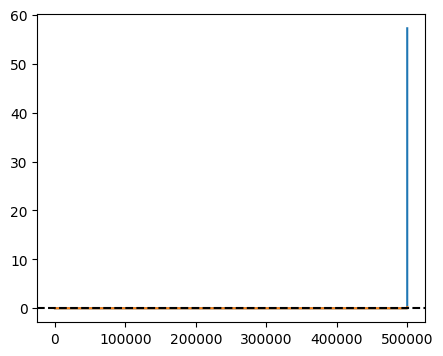

In [8]:
# graph lyp convergence
fig, ax = plt.subplots(figsize=(5, 4))
plt.plot(arr[:,1], label=("time (s)"))
plt.plot(arr[:, 0], label=("lyp estimate"))
plt.axhline(y=0.0, color='black', linestyle='dashed')

plt.show()

via csv upload/download

In [ ]:
import numpy as np
import matplotlib as plt

In [ ]:
# import csv

data_lddp = np.loadtxt('lddp_lyp.csv', delimiter=',')
data_qddp = np.loadtxt('qddp_lyp.csv', delimiter=',')
data_dp = np.loadtxt('dp_lyp.csv', delimiter=',')

In [ ]:
# plot linearly-damped driven pendulum

fig, ax = plt.subplots()
gamma_arr_2 = np.arange(0., 10., 0.01)

ax.plot(gamma_arr_2, data_lddp, color = 'blue')
plt.axhline(y = 0, color = 'cyan', linestyle = '--')
ax.set_xlim(0, 10)
ax.set_xlabel('Gamma')
ax.set_ylabel('Max Lyapunov Exponent (1/s)')
ax.set_title('Max Lyapunov Exponent vs. Gamma for Linearly-Damped Driven Pendulum')

plt.show()

In [ ]:
# plot quadratically-damped driven pendulum

fig, ax = plt.subplots()
gamma_arr_2 = np.arange(0., 10., 0.01)

ax.plot(gamma_arr_2, data_lddp, color = 'blue')
plt.axhline(y = 0, color = 'cyan', linestyle = '--')
ax.set_xlim(0, 10)
ax.set_xlabel('Gamma')
ax.set_ylabel('Max Lyapunov Exponent (1/s)')
ax.set_title('Max Lyapunov Exponent vs. Gamma for Linearly-Damped Driven Pendulum')

plt.show()

In [ ]:
# plot double pendulum

fig, ax = plt.subplots()
theta1_0_arr_2 = np.arange(0, np.pi, 0.001)

ax.plot(theta1_0_arr_2, data_dp, color = 'blue')
#plt.axhline(y = 0, color = 'cyan', linestyle = '--')

ax.set_xlim(0, np.pi)
ax.set_xlabel('Theta1_0 (rad)')
ax.set_ylabel('Max Lyapunov Exponent (1/s)')
ax.set_title('Max Lyapunov Exponent vs. Initial Angle for Double Pendulum')

plt.show()

In [ ]:
# dp heatmap

# reshape dp results into 2D heatmap for plotting
dp_grid = np.array(results3).reshape(N, N)

# plot dp
vegetables = ["cucumber", "tomato", "lettuce", "asparagus",
              "potato", "wheat", "barley"]
farmers = ["Farmer Joe", "Upland Bros.", "Smith Gardening",
           "Agrifun", "Organiculture", "BioGoods Ltd.", "Cornylee Corp."]

harvest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0, 4.0, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 2.7, 0.0, 0.0],
                    [1.1, 2.4, 0.8, 4.3, 1.9, 4.4, 0.0],
                    [0.6, 0.0, 0.3, 0.0, 3.1, 0.0, 0.0],
                    [0.7, 1.7, 0.6, 2.6, 2.2, 6.2, 0.0],
                    [1.3, 1.2, 0.0, 0.0, 0.0, 3.2, 5.1],
                    [0.1, 2.0, 0.0, 1.4, 0.0, 1.9, 6.3]])


fig, ax = plt.subplots()
im = ax.imshow(dp_grid)

ax.set_xticks(range(len(theta1_0_arr)), labels=theta1_0_arr,
                rotation=45, ha="right", rotation_mode="anchor")
ax.set_yticks(range(len(theta2_0_arr)), labels=theta2_0_arr)

# Loop over data dimensions and create text annotations.
for i in range(len(theta1_0_arr)):
    for j in range(len(theta2_0_arr)):
        text = ax.text(j, i, harvest[i, j],
                        ha="center", va="center", color="w")

ax.set_title("Max Lyapunov Exponent for Double Pendulum Angles")
fig.tight_layout()
plt.show()